In [1]:
import pandas as pd

titanic_df = pd.read_csv("Titanic_data.csv")

In [2]:
titanic_df.corr(numeric_only = True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [3]:
titanic_df[["Age", "Pclass"]]

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3
...,...,...
886,27.0,2
887,19.0,1
888,NaN,3
889,26.0,1


<Axes: xlabel='Age', ylabel='Pclass'>

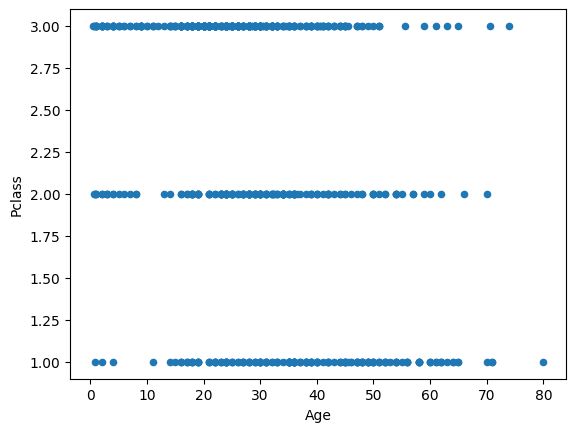

In [5]:
titanic_df[["Age", "Pclass"]].plot(kind="scatter", x="Age", y= "Pclass")

# Chi-Square Tet

to check whether two continious variables have any relationship. 

In [6]:
import scipy.stats as stats

In [7]:
contengency_table = pd.crosstab(titanic_df.Pclass, titanic_df.Survived)
contengency_table

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [8]:
stats.chi2_contingency(contengency_table) #Chi2, pvalue, dof, expectd_f

Chi2ContingencyResult(statistic=np.float64(102.88898875696056), pvalue=np.float64(4.549251711298793e-23), dof=2, expected_freq=array([[133.09090909,  82.90909091],
       [113.37373737,  70.62626263],
       [302.53535354, 188.46464646]]))

In [15]:
chi2_score, pvalue, dof, expectd_f = stats.chi2_contingency(contengency_table)
print(f"chi_square test score = {round(chi2_score, 3)}")
print(f"p-value = {round(pvalue, 5)}")

chi_square test score = 102.889
p-value = 0.0


1. Hypothesis Decision

Null hypothesis (H₀): The two categorical variables are independent.

Result: Reject H₀ very strongly.

A p-value reported as 0.0 by software means the probability is extremely small, not literally zero.

2. Strength of Evidence

A χ² value of 102.889 is very large for typical contingency tables. This indicates a substantial deviation between observed and expected frequencies.

In plain terms:
The observed pattern is highly unlikely to be due to random chance.

How to Report This Properly

In professional or academic writing, report it as:

“A chi-square test showed a statistically significant association between the variables
(χ² = 102.89, p < 0.001).”

Do not write p = 0.0.

Important Next Step: Effect Size

Statistical significance does not tell you how strong the relationship is.

Calculate Cramér’s V
import numpy as np

n = contingency_table.sum().sum()
cramers_v = np.sqrt(102.889 / (n * (min(contingency_table.shape) - 1)))
cramers_v

Interpretation Guide
Cramér’s V	Strength
~0.1	Weak
~0.3	Moderate
≥0.5	Strong

This step is essential for data science, policy, and program evaluation contexts.